In [1]:
import isopy
import matplotlib.pyplot as plt
import math

# Molecular and isobaric interferences
Here we model the effects of molecular and isobaric interferences on an element

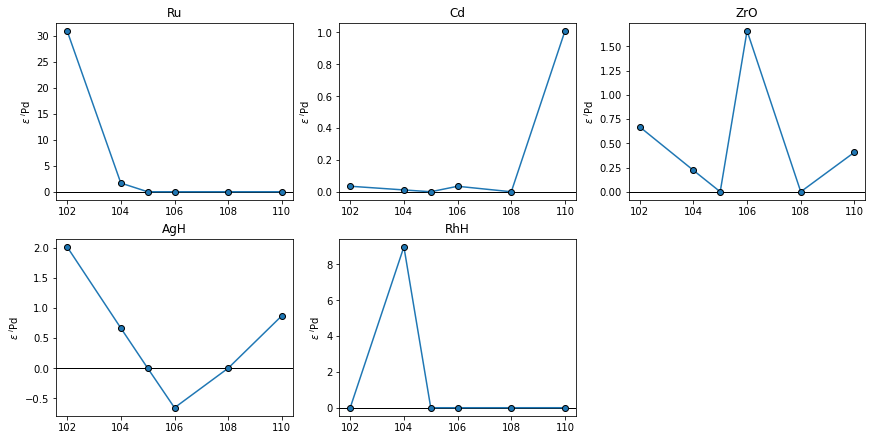

In [2]:
element = 'pd'
mf_ratio = '108pd/105pd'
interferences = 'Ru Cd ZrO AgH RhH'.split()

axes = isopy.tb.create_subplots(plt, interferences, (-1, 3), figure_width=12, figure_height=math.ceil(len(interferences)//3*6))

for interference in interferences:
    data = isopy.tb.make_ms_array({element: 1, interference: 0.0001})
    data = data.filter(element_symbol=element)
    corr = isopy.tb.internal_normalisation.epsilon(data, mf_ratio)
    
    ax = axes[str(interference)]
    isopy.tb.plot_spider(ax, corr, constants=mf_ratio)
    ax.axhline(0, color = 'black', linewidth=1)
    isopy.tb.update_axes(ax, title = interference, ylabel='$\epsilon$ $^{i}$Pd')

In [ ]:
interferences = 'Ru Cd ZrO AgH RhH'.split()

axes = isopy.tb.create_subplots(plt, interferences, (-1, 3), figure_width=12, figure_height=math.ceil(len(interferences)//3*6))

for interference in interferences:
    data = isopy.tb.make_ms_array({element: 1, interference: 0.0001})
    data = data.filter(element_symbol=element)
    corr = isopy.tb.internal_normalisation.epsilon(data, mf_ratio)
    
    ax = axes[str(interference)]
    isopy.tb.plot_spider(ax, corr, constants=mf_ratio)
    ax.axhline(0, color = 'black', linewidth=1)
    isopy.tb.update_axes(ax, title = interference, ylabel='$\epsilon$ $^{i}$Pd')

# *s*-process deficit 
Here we model a small *s*-process deficit on our element using the *s*-process fractions from Bisterzo et al. (2011)

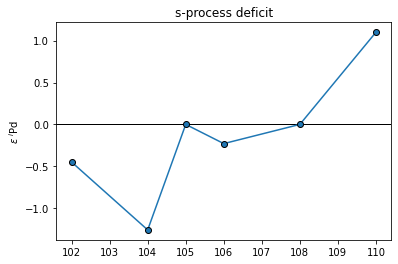

In [5]:
sdata = isopy.tb.make_ms_array(element)
sdata = sdata - (sdata * isopy.refval.isotope.sprocess_fraction_B11) * 0.0001
scorr = isopy.tb.internal_normalisation.epsilon(sdata, mf_ratio)

isopy.tb.plot_spider(plt, scorr, constants=mf_ratio)
plt.axhline(0, color = 'black', linewidth=1)
isopy.tb.update_axes(plt, title = 's-process deficit', ylabel='$\epsilon$ $^{i}$Pd')